In [1]:
import matplotlib.pyplot as plt
import pandas as pd;
import numpy as np;

In [2]:
import matplotlib.pyplot as plt

def load_operation_logs(logName):
    folder = "../logs/backups/../"
    filename = folder + logName + ".log"
    df = pd.read_csv(filename, index_col=None, \
                     names = ["time", "operation", "round", "turn", "message", "startTime", "durationMs", "numStates", "numStatesScanned", "action", "actor"],\
                     dtype = {"operation" : str}, \
                     parse_dates = ["time", "startTime"])
    df["operation"] = df["operation"].str.strip()
    return df

all_operations = load_operation_logs("operationTime")
markov_operations = load_operation_logs("markovDecisionProcessTiming")

In [3]:
all_operations = load_operation_logs("operationTime")
per_round_df = all_operations[["operation", "round", "durationMs"]].groupby(["operation", "round"]).sum()

# per_round_df

<AxesSubplot:xlabel='round'>

<Figure size 432x288 with 0 Axes>

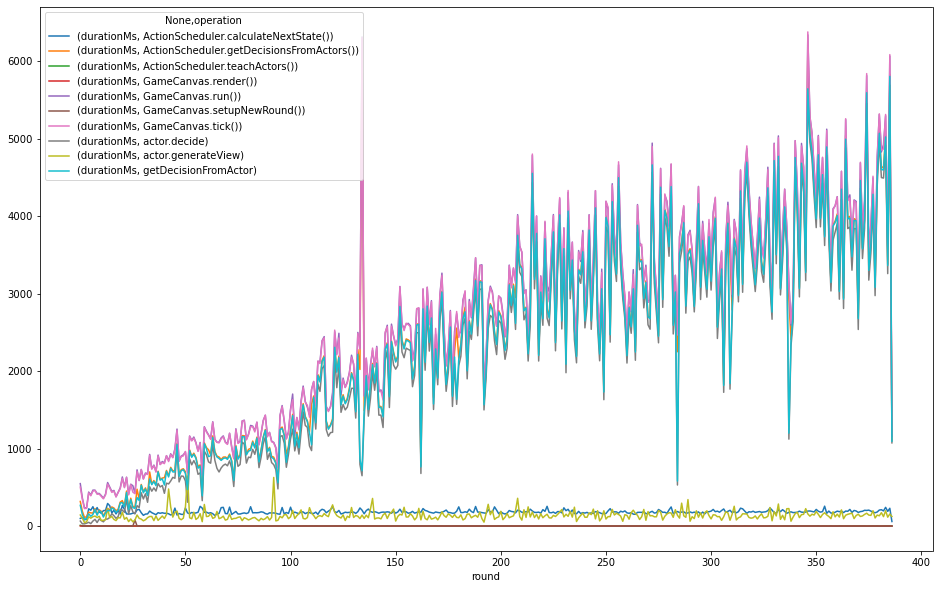

In [4]:
plt.figure()
per_round_df.unstack(level=0).plot(figsize=(16,10))

In [5]:

time_diffs = all_operations[["operation", "round", "turn", "durationMs", "startTime"]]\
    .groupby(["round"]).agg({"startTime" : ["min", "max"], "turn":["max"]})
time_diffs["totalTime"] = (time_diffs["startTime"]["max"] - time_diffs["startTime"]["min"]).dt.seconds
time_diffs["framesPerSecond"] = time_diffs["turn"]["max"]/time_diffs["totalTime"]
time_diffs = time_diffs[["totalTime", "framesPerSecond"]]

In [6]:
time_diffs

startTime                                      \
                                      min                                 max   
round                                                                           
0        2022-02-17 07:58:22.110800+00:00 2022-02-17 07:58:22.663924400+00:00   
1     2022-02-17 07:58:22.663924400+00:00 2022-02-17 07:58:23.038008300+00:00   
2     2022-02-17 07:58:23.038008300+00:00 2022-02-17 07:58:23.282063500+00:00   
3     2022-02-17 07:58:23.282063500+00:00    2022-02-17 07:58:23.522117+00:00   
4        2022-02-17 07:58:23.522117+00:00 2022-02-17 07:58:23.968217300+00:00   
...                                   ...                                 ...   
382   2022-02-17 08:14:57.697442500+00:00    2022-02-17 08:15:02.569537+00:00   
383      2022-02-17 08:15:02.569537+00:00 2022-02-17 08:15:07.890732900+00:00   
384   2022-02-17 08:15:07.890732900+00:00 2022-02-17 08:15:11.498544100+00:00   
385   2022-02-17 08:15:11.498544100+00:00 2022-02-17 08:15:17.589911800+00:00   
386   2022-02-17 08:15:17.589911800+00:00 2022-02-17 08:15:18.767175800+00:00   

      turn totalTime framesPerSecond  
       max                            
round                                 
0      399         0             inf  
1      399         0             inf  
2      399         0             inf  
3      399         0             inf  
4      399         0             inf  
...    ...       ...             ...  
382    399         4           99.75  
383    399         5           79.80  
384    399         3          133.00  
385    399         6           66.50  
386    116         1          116.00  

[387 rows x 5 columns]